#### - Sobhan Moradian Daghigh
##### - 11/10/2021
##### 
##### - ML - EX01 - Q1

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the dataset

In [6]:
dataset = pd.read_csv('./ML-HW01/dataset1/dataset1.csv')
dataset.head()

,x,y
0,0.097627,0.626964
1,0.430379,0.846452
2,0.205527,0.756017
3,0.089766,0.427504
4,-0.152690,-1.335228


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


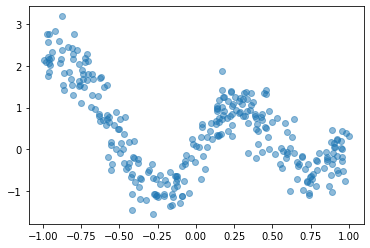

In [8]:
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], alpha= 0.5)
plt.show()

#### To have a polynomial regression as a linear regression problem, update the dataset as below:
#### h(x) = θ0 + ... + θi(x^i) + ... θd(x^d)
#### ---> h(x) = θ0 + ... + θi(xi) + ... θd(xd)

In [54]:
df = pd.DataFrame()
labels = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

for i in range(11):
    df[labels[i]] = np.power(dataset.iloc[:,0], i)
    
df['y'] = dataset.iloc[:, 1]

df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.0,0.097627,0.009531,0.000930,0.000091,0.000009,8.658046e-07,8.452591e-08,8.252012e-09,8.056192e-10,7.865019e-11,0.626964
1,1.0,0.430379,0.185226,0.079717,0.034309,0.014766,6.354843e-03,2.734989e-03,1.177081e-03,5.065907e-04,2.180259e-04,0.846452
2,1.0,0.205527,0.042241,0.008682,0.001784,0.000367,7.537202e-05,1.549097e-05,3.183808e-06,6.543577e-07,1.344880e-07,0.756017
3,1.0,0.089766,0.008058,0.000723,0.000065,0.000006,5.232170e-07,4.696729e-08,4.216083e-09,3.784624e-10,3.397320e-11,0.427504
4,1.0,-0.152690,0.023314,-0.003560,0.000544,-0.000083,1.267274e-05,-1.935005e-06,2.954567e-07,-4.511341e-08,6.888384e-09,-1.335228


#### Ok we're not allowded to use build-in funcs for Gradient Descent.
#### So let's define it according to the algorithm.

In [66]:
# I decided to start learning rate from 0.02 and decrease it during iterations
alpha = 0.02 
epochs = [5000, 10000]
degrees = [5, 8, 10]

a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = [0] * 11
coeffs = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]

# Data count
m = df.shape[0]

def gd(epoch, degree):
    for _ in range(epoch):
        predY_cal(coeffs, df, degree[0])
# np.power(alpha, np.divide(iteretion, epoch))

0

In [58]:
def update_coefficients(coeffs, alpha, m, predY, df):
    for coeff in coeffs:
        coeff -= np.multiply(alpha, np.multiply(np.divide(1, m), np.multiply(sum(np.subtract(df.loc['y'], predY)), df.iloc[:, coeffs.index(coeff)])))
    
    return coeffs    

In [35]:
def predY_cal(coeffs, df, degree):
    for i in range(degree):
        sum_ += np.multiply(coeffs[i], df.iloc[:, i])
    return sum_